## Stock Price Prediction 

BY - PANKAJ KANYAL

## Importing Packages


In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


### Reading data from the url

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv',index_col='Date',parse_dates=True)

In [3]:
df.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2035 entries, 2018-09-28 to 2010-07-21
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Open                  2035 non-null   float64
 1   High                  2035 non-null   float64
 2   Low                   2035 non-null   float64
 3   Last                  2035 non-null   float64
 4   Close                 2035 non-null   float64
 5   Total Trade Quantity  2035 non-null   int64  
 6   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 127.2 KB


In [5]:
df.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


## Data Visualization

### Line chart Showing trends in the Opening of Stock Price

findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.
findfont: Font family ['xkcd', 'xkcd Script', 'Humor Sans', 'Comic Neue', 'Comic Sans MS'] not found. Falling back to DejaVu Sans.


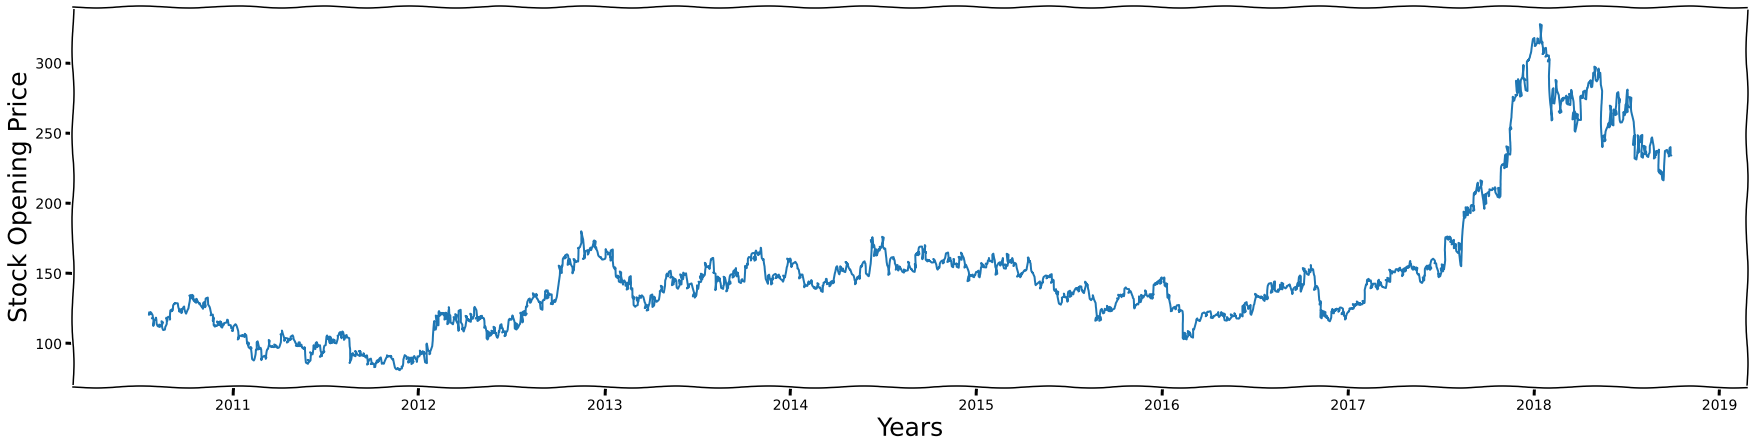

In [7]:
def plotOpening():
    plt.xkcd()
    plt.rcParams['figure.figsize'] = (30,7)
    plt.ylabel('Stock Opening Price',fontsize=(25))
    plt.xlabel('Years',fontsize=(25))
    plt.plot(df['Open'])
    plt.show()

plotOpening()

### Getting the rolling mean of the Week

In [8]:
df.rolling(7).mean().head(10)

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-19,235.200000,237.557143,231.135714,234.414286,234.307143,3.274848e+06,7652.388571
2018-09-18,235.750000,238.028571,231.607143,234.700000,234.492857,3.209831e+06,7509.724286
2018-09-17,235.550000,238.200000,231.485714,235.071429,234.971429,2.936693e+06,6879.075714


<AxesSubplot:xlabel='Date'>

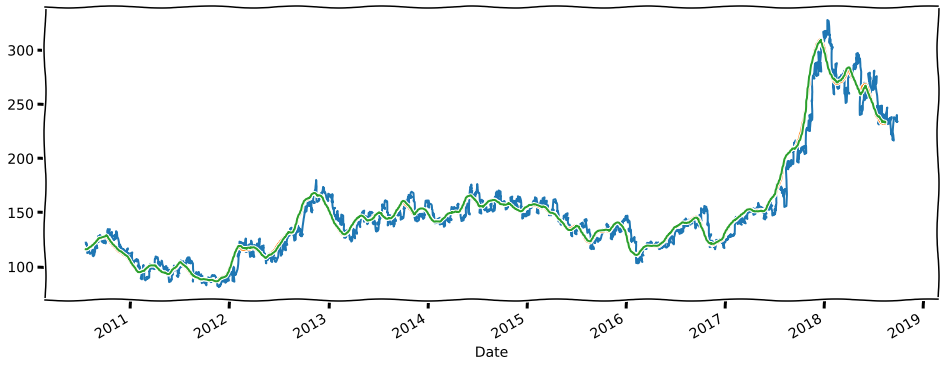

In [9]:
df['Open'].plot(figsize=(16,6))
df.rolling(window=30).mean()['Close'].plot()
df.rolling(window=30).mean()['Open'].plot()

<AxesSubplot:xlabel='Date'>

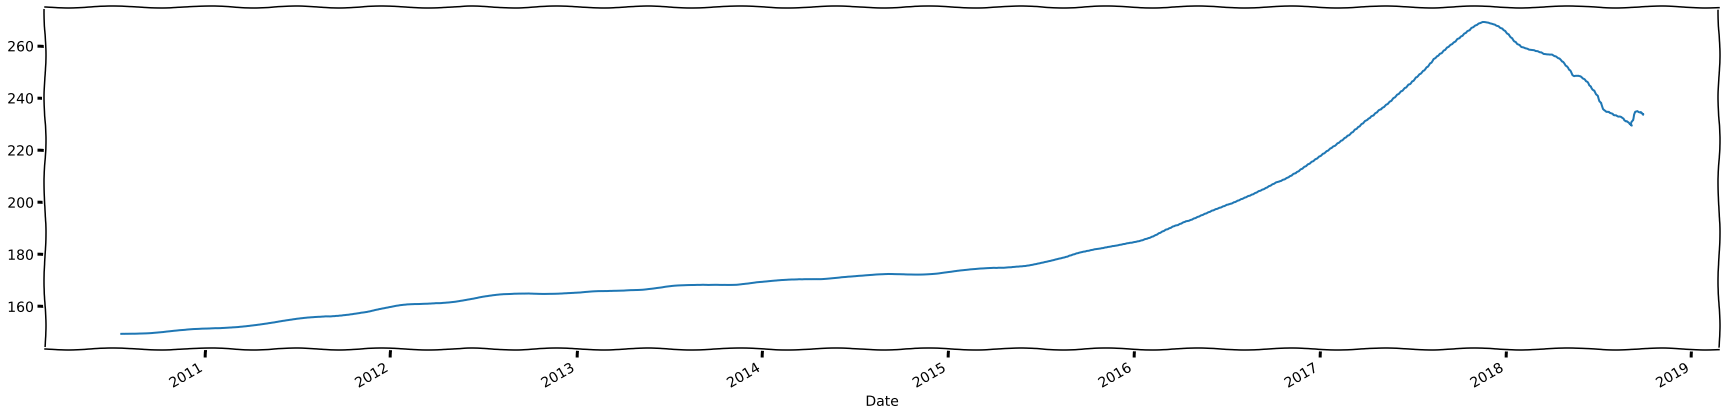

In [10]:
df['Close'].expanding(min_periods=1).mean().plot()

## Data Preprocessing

In [11]:
training_set = df['Open']
training_set = pd.DataFrame(training_set)
training_set = training_set.reset_index()['Open']
training_set

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

In [12]:
training_set.shape

(2035,)

#### Scaling Down the features between in the range of [0, 1]

In [13]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(np.array(training_set).reshape(-1,1))

#### Spliting data into train and test sets, 70% data on training and rest 30% on testing

In [14]:
size = len(training_set_scaled)
train_size = int(size*0.70)
test_size = size - train_size

df_train = training_set_scaled[0:train_size,:]
df_test = training_set_scaled[train_size:size,:1]

### Defining 'select_dataset_timestep()'  function to create x_train, x_test, y_train, y_test

In [15]:
def select_dataset_timestep(dfl,timestep=1):
    df_X = []
    df_Y = []
    for i in range(len(dfl)-timestep - 1):
        df_X.append(dfl[i:(i+timestep),0])
        df_Y.append(dfl[(i+timestep),0])
    
    return np.array(df_X), np.array(df_Y)

In [16]:
df_train.shape

(1424, 1)

In [17]:
timestamp = 60

X_train, Y_train = select_dataset_timestep(df_train,timestamp)
X_test, Y_test = select_dataset_timestep(df_test,timestamp)

In [18]:
X_train.shape

(1363, 60)

In [19]:
Y_train.shape

(1363,)

In [20]:
X_test.shape

(550, 60)

In [21]:
Y_test.shape

(550,)

In [22]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [23]:
X_train.shape

(1363, 60, 1)

In [24]:
X_test.shape

(550, 60, 1)

### Building Model Using tensorflow with Multiple Layers and Predicting output

In [25]:
import tensorflow as tf
from sklearn.metrics import mean_squared_error

model = tf.keras.models.Sequential([
        tf.keras.layers.LSTM(50,return_sequences=True,input_shape=(X_train.shape[1],1)),
        tf.keras.layers.LSTM(50,return_sequences=True),
        tf.keras.layers.LSTM(50),
        tf.keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')

2022-07-03 16:43:31.681244: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-03 16:43:31.681264: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-07-03 16:43:32.511669: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2022-07-03 16:43:32.511696: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: pankajsingh-Inspiron-5502
2022-07-03 16:43:32.511700: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: pankajsingh-Inspiron-5502
2022-07-03 16:43:32.511767: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-07-03 16:43:32.511780: I tensorflow/stream_executor/cuda/c

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
hist = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 40, verbose = 1)

Epoch 1/30
35/35 [==============================] - 4s 61ms/step - loss: 0.0243 - val_loss: 0.0016
Epoch 2/30
35/35 [==============================] - 2s 43ms/step - loss: 0.0021 - val_loss: 0.0015
Epoch 3/30
35/35 [==============================] - 2s 44ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 4/30
35/35 [==============================] - 2s 45ms/step - loss: 0.0016 - val_loss: 9.3121e-04
Epoch 5/30
35/35 [==============================] - 2s 48ms/step - loss: 0.0022 - val_loss: 0.0011
Epoch 6/30
35/35 [==============================] - 2s 62ms/step - loss: 0.0014 - val_loss: 8.6668e-04
Epoch 7/30
35/35 [==============================] - 2s 60ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/30
35/35 [==============================] - 2s 47ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 9/30
35/35 [==============================] - 2s 47ms/step - loss: 0.0011 - val_loss: 8.4858e-04
Epoch 10/30
35/35 [==============================] - 2s 58ms/step - loss: 0.0011 - val_loss: 7.01

In [28]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [29]:
train_predict= sc.inverse_transform(train_predict)
test_predict = sc.inverse_transform(test_predict)

In [30]:
import math
from sklearn.metrics import mean_squared_error

print('MSE ON TRAIN SET : {}'.format(math.sqrt(mean_squared_error(Y_train,train_predict))))
print('MSE ON TEST SET : {}'.format(math.sqrt(mean_squared_error(Y_test,test_predict))))

MSE ON TRAIN SET : 168.88774926619953
MSE ON TEST SET : 112.42273675503189


#### Visualizing Result of Prediction

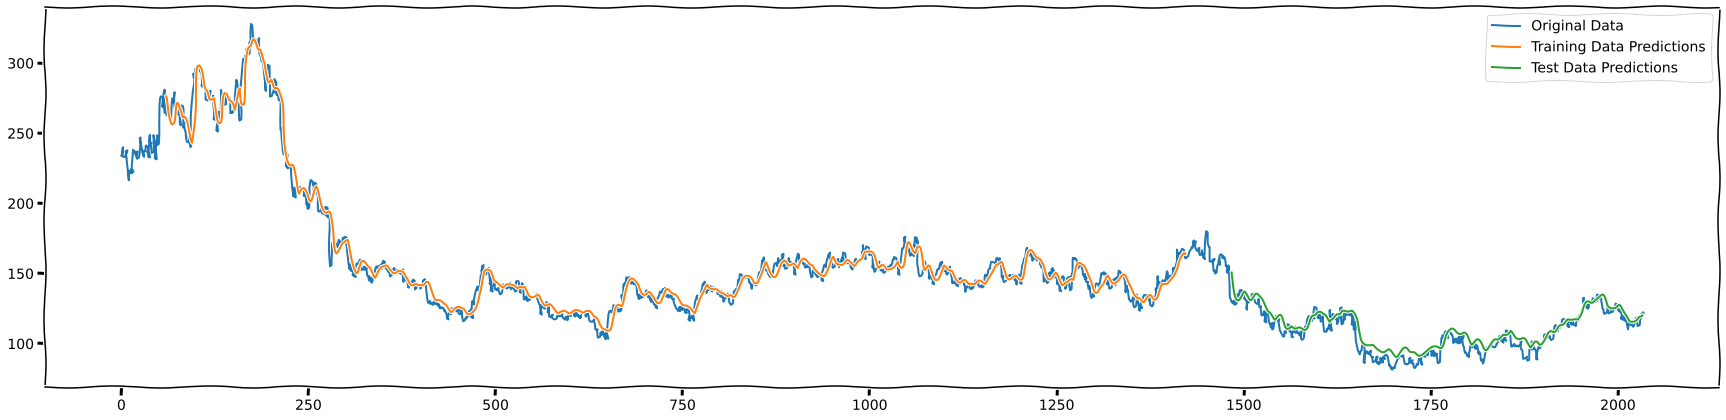

In [33]:
look_back= timestamp #timestamp
trainPredictPlot = np.empty_like(training_set_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(training_set_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(training_set_scaled)-1, :] = test_predict

plt.plot(sc.inverse_transform(training_set_scaled))
plt.rcParams['figure.figsize'] = (15,4)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['Original Data','Training Data Predictions','Test Data Predictions'])
plt.show()